In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("fish.csv")

In [3]:
df

length    weight    type
0    8.618381  7.848030    tuna
1    2.522046  8.762507    tuna
2    2.035690  7.101971    tuna
3    6.695008  4.953932  salmon
4    9.834069  7.908453    tuna
..        ...       ...     ...
995  3.710186  0.956612  salmon
996  3.749596  9.557450  salmon
997  2.410087  3.355781    tuna
998  0.990773  3.812210    tuna
999  7.519778  5.392817    tuna

[1000 rows x 3 columns]

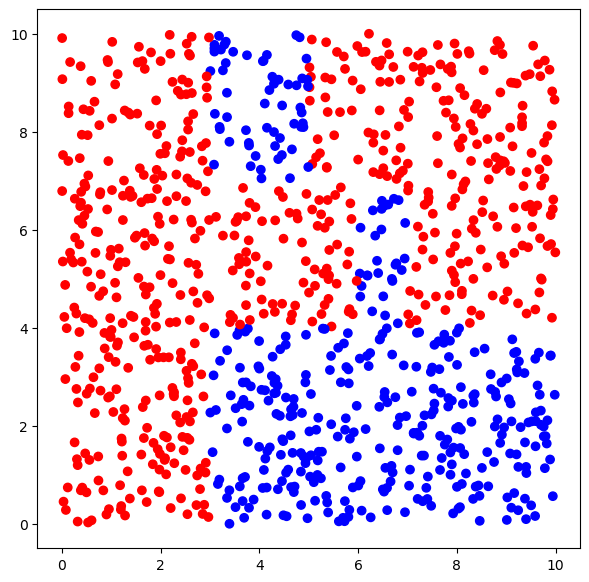

In [4]:
plt.figure(figsize=(7,7))
plt.scatter(df.length, df.weight, color=['red' if t=='tuna' else 'blue' for t in df.type])

In [5]:
df.type = df.type.apply(lambda t: 1 if t == 'salmon' else 0)

In [6]:
df

length    weight  type
0    8.618381  7.848030     0
1    2.522046  8.762507     0
2    2.035690  7.101971     0
3    6.695008  4.953932     1
4    9.834069  7.908453     0
..        ...       ...   ...
995  3.710186  0.956612     1
996  3.749596  9.557450     1
997  2.410087  3.355781     0
998  0.990773  3.812210     0
999  7.519778  5.392817     0

[1000 rows x 3 columns]

In [7]:
def get_entropy(vals):
    p = np.mean(vals)
    if p==0 or p==1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [8]:
def get_entropy_from_split(df, feature, val):
    left_types = df[df[feature] < val].type
    right_types = df[df[feature] >= val].type
    
    left_entropy = get_entropy(left_types)
    right_entropy = get_entropy(right_types)
    
    left_prop = len(left_types) / len(df)
    right_prop = len(right_types) / len(df)
    
    return left_prop*left_entropy + right_prop*right_entropy

In [9]:
curr_df = df.copy()
#Input conditions of previous splits
curr_df = curr_df[(curr_df.length > 3) & (curr_df.weight > 4)]

In [10]:

features = ['length', 'weight']

best_params = {'feature': None, 'val': None, 'entropy': np.inf}

for f in features:
    curr = curr_df[f].min()
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params.values())


dict_values(['length', 7.008879131610914, 0.5524718527527053])


In [17]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

features = ['length', 'weight']

df = pd.read_csv("fish.csv")
d = {'tuna': 0, 'salmon': 1}
df['type'] = df['type'].map(d)
X = df[features] #features
y = df["type"] #target variable



# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#train model on training set
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

       length    weight  type
0    8.618381  7.848030     0
1    2.522046  8.762507     0
2    2.035690  7.101971     0
3    6.695008  4.953932     1
4    9.834069  7.908453     0
..        ...       ...   ...
995  3.710186  0.956612     1
996  3.749596  9.557450     1
997  2.410087  3.355781     0
998  0.990773  3.812210     0
999  7.519778  5.392817     0

[1000 rows x 3 columns]
Accuracy: 1.0


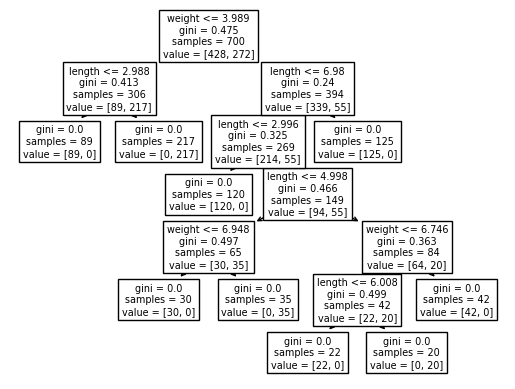

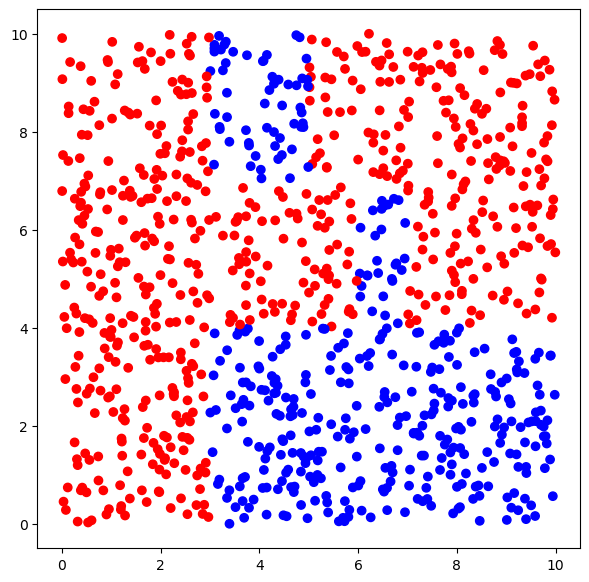

In [23]:
import sys
from sklearn import tree
tree.plot_tree(dtree, feature_names=features)

plt.figure(figsize=(7,7))
plt.scatter(df.length, df.weight, color=['red' if t==0 else 'blue' for t in df.type])

#Two  lines to make our compiler able to draw:
sys.stdout.flush()
